# <font style="color:blue">Project 2: Kaggle Competition - Classification</font>

#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Data Loader</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Configuration</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Evaluation Metric</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Train and Validation</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Utils</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Experiment</h3></td><td><h3>5</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>TensorBoard Dev Scalars Log Link</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>


In [1]:
%matplotlib inline

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import functional as F

import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd

from PIL import Image

## <font style="color:green">1. Data Loader [10 Points]</font>

In this section, you have to write a class or methods, which will be used to get training and validation data loader.

You need to write a custom dataset class to load data.

**Note; There is   no separate validation data. , You will thus have to create your own validation set, by dividing the train data into train and validation data. Usually, we do 80:20 ratio for train and validation, respectively.**


For example:

```python
class KenyanFood13Dataset(Dataset):
    """
    
    """
    
    def __init__(self, *args):
    ....
    ...
    
    def __getitem__(self, idx):
    ...
    ...
    
    
```

```
def get_data(args1, *agrs):
    ....
    ....
    return train_loader, test_loader
```

In [3]:
class KenyanFood13Dataset(Dataset):
    """
    This custom dataset class takes root directory and train flag,
    and returns training dataset if train flag is true
    else it returns validation dataset.
    """
    
    def __init__(self, data_root, train=True, image_shape=None, transform=None):
        label_csv_path = os.path.join(data_root, 'train.csv')
        
        self.label_df = pd.read_csv(label_csv_path)
        percentage_indx = int(len(self.label_df) * 0.8)
        self.train_label_df = self.label_df[:percentage_indx]
        self.valid_label_df = self.label_df[percentage_indx:]
        
        if image_shape is not None:
            if isinstance(image_shape, int):
                self.image_shape = (image_shape, image_shape)
            elif isinstance(image_shape, tuple) or isinstance(image_shape, list):
                assert len(image_shape) == 1 or len(image_shape) == 2, 'Invalid image_shape tuple size'
                if len(image_shape) == 1:
                    self.image_shape = (image_shape[0], image_shape[0])
                else:
                    self.image_shape = image_shape
            else:
                raise NotImplementedError
        else:
            self.image_shape = image_shape
        
        self.transform = transform
        
        num_classes = 13
        
        self.data_dict = {
            'image_path': [],
            'label': []
        }
        
        img_dir = os.path.join(data_root, 'images', 'images')
        
        if train:
            list1 = []
            for idx in range(len(self.train_label_df['id'])):
                list1.append(os.path.join(img_dir, str(self.train_label_df['id'][idx]) + '.jpg'))
            self.data_dict['image_path'].append(pd.DataFrame(list1))
            self.data_dict['label'].append(self.train_label_df["class"])
        else:
            list1 = []
            for idx in range(5228, 5228 + len(self.valid_label_df['id'])):
                list1.append(os.path.join(img_dir, str(self.valid_label_df['id'][idx]) + '.jpg'))
            self.data_dict['image_path'].append(pd.DataFrame(list1))
            self.data_dict['label'].append(self.valid_label_df["class"])
    
    def __len__(self):
        """
        Return Length of the dataset
        """
        return len(self.data_dict['label'][0])
    
    def __getitem__(self, idx):
        """
        For given index, return images with resize and preprocessing.
        """
#         print(self.data_dict['image_path'][0][0][50])
        image = Image.open(self.data_dict['image_path'][0][0][idx]).convert("RGB")
        
        if self.image_shape is not None:
            image = F.resize(image, self.image_shape)  
        if self.transform is not None:
            image = self.transform(image)
        
        target = self.data_dict['label'][0][idx]
        
        return image, target
        

Length of dataset: 5228, class_name: githeri


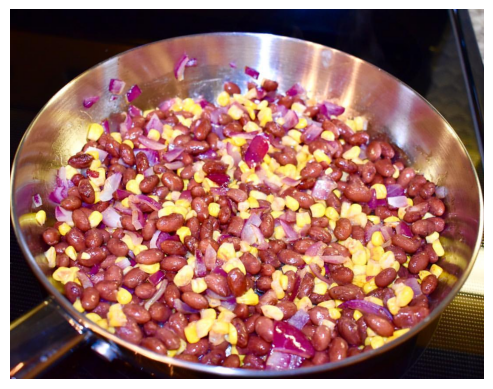

In [4]:
data_root = '/kaggle/input/opencv-pytorch-dl-course-classification'

train_dataset = KenyanFood13Dataset(data_root, train=True)

img, trgt = train_dataset[0]

print('Length of dataset: {}, class_name: {}'.format(len(train_dataset), trgt))
plt.imshow(img)
plt.axis(False)
plt.show()

In [5]:
def get_data():
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
        ])
    
    train_dataset = KenyanFood13Dataset(data_root, train=True, image_shape=None, transform=preprocess)
    
    train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=15,
            shuffle=True,
            num_workers=2
        )
    
    test_dataset = KenyanFood13Dataset(data_root, train=False, image_shape=None, transform=preprocess)
    
    test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=15,
            shuffle=False,
            num_workers=2
        )
    
    return train_loader, test_loader

train_loader, test_loader = get_data()

# plt.rcParams['figure.figsize'] = (15, 9)
# plt.figure()
# for images, labels in test_loader:
#     for i in range(len(labels)):
#         plt.subplot(3, 5, i+1)
#         img = F.to_pil_image(images[i])
#         plt.imshow(img)
#         plt.gca().set_title('Trgt: {}'.format(labels[i]))
#     plt.show()
#     break
    

## <font style="color:green">2. Configuration [5 Points]</font>

**Define your configuration here.**

For example:


```python
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 10 
    epochs_count: int = 50  
    init_learning_rate: float = 0.1  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "/kaggle/input/pytorch-opencv-course-classification/" 
    num_workers: int = 2  
    device: str = 'cuda'  
    
```

## <font style="color:green">3. Evaluation Metric [10 Points]</font>

**Define methods or classes that will be used in model evaluation. For example, accuracy, f1-score etc.**

## <font style="color:green">4. Train and Validation [5 Points]</font>


**Write the methods or classes to be used for training and validation.**

## <font style="color:green">5. Model [5 Points]</font>

**Define your model in this section.**

**You are allowed to use any pre-trained model.**

## <font style="color:green">6. Utils [5 Points]</font>

**Define those methods or classes, which have  not been covered in the above sections.**

## <font style="color:green">7. Experiment [5 Points]</font>

**Choose your optimizer and LR-scheduler and use the above methods and classes to train your model.**

## <font style="color:green">8. TensorBoard Dev Scalars Log Link [5 Points]</font>

**Share your TensorBoard scalars logs link here You can also share (not mandatory) your GitHub link, if you have pushed this project in GitHub.**


For example, [Find Project2 logs here](https://tensorboard.dev/experiment/kMJ4YU0wSNG0IkjrluQ5Dg/#scalars).

## <font style="color:green">9. Kaggle Profile Link [50 Points]</font>

**Share your Kaggle profile link  with us here to score , points in  the competition.**

**For full points, you need a minimum accuracy of `75%` on the test data. If accuracy is less than `70%`, you gain  no points for this section.**


**Submit `submission.csv` (prediction for images in `test.csv`), in the `Submit Predictions` tab in Kaggle, to get evaluated for  this section.**